# Clase 205 - Regresiones

> Machine Learning
>
> [Alan Badillo Salas](mailto:alan@nomadacode.com)
>
> Github: [https://github.com/dragonnomada/ml-2023](https://github.com/dragonnomada/ml-2023)

**Contenido**

* Modelos lineales
* Optimización de los mínimos cuadrados
* Regresión lineal
* Regresión polinomial
* Regularización
* Regresión logística
* Regresión bayesiana
* Curva de aprendizaje

## Modelos lineales

[https://scikit-learn.org/stable/modules/linear_model.html](https://scikit-learn.org/stable/modules/linear_model.html)

$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$

$w = (w_1, ..., w_p)$

$w_0$

### Modelo Lineal $y = w_1 x1 + w_0$

In [53]:
import numpy as np

x1 = np.linspace(-10, 10, 21)

y = 3 * x1 - 4

print(f"x1 = {x1}")
print("-" * 70)
print(f"y = {y}")

x1 = [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
----------------------------------------------------------------------
y = [-34. -31. -28. -25. -22. -19. -16. -13. -10.  -7.  -4.  -1.   2.   5.
   8.  11.  14.  17.  20.  23.  26.]


[https://www.w3schools.com/python/matplotlib_markers.asp](https://www.w3schools.com/python/matplotlib_markers.asp)

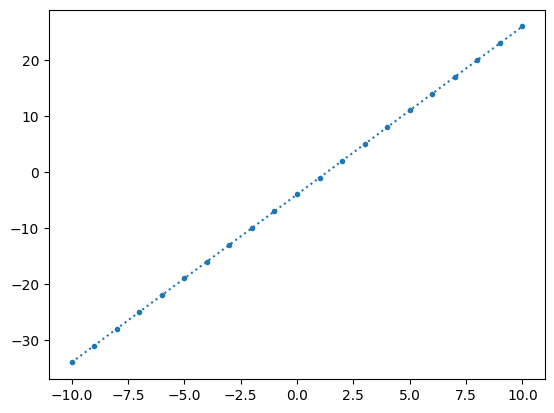

In [30]:
import matplotlib.pyplot as plt

plt.plot(x1, y, '.:')
plt.show()

### Modelo Lineal $y = w_1 x1 + w_2 x_2 + w_0$

[https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

In [55]:
import numpy as np

x1 = np.linspace(-10, 10, 11)
x2 = np.linspace(-5, 5, 11)

x1v, x2v = np.meshgrid(x1, x2)

y = 4 * x1v + 5 * x2v - 6

print(f"x1 = {x1}")
print("-" * 70)
print(f"x2 = {x2}")
print("-" * 70)
print(f"x1v = {x1v}")
print("-" * 70)
print(f"x2v = {x2v}")
print("-" * 70)
print(f"y = {y}")

x1 = [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
----------------------------------------------------------------------
x2 = [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
----------------------------------------------------------------------
x1v = [[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]]
----------------------------------------------------------------------
x2v = [[-5. -5. -5. -5. -5. -

[https://matplotlib.org/stable/gallery/mplot3d/contour3d_3.html](https://matplotlib.org/stable/gallery/mplot3d/contour3d_3.html)

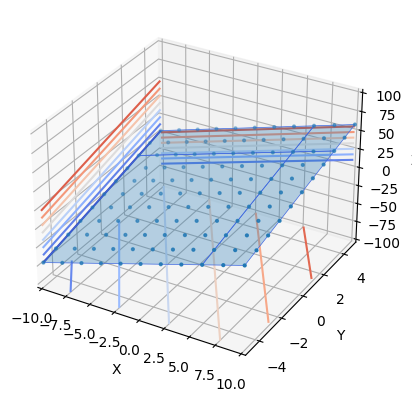

In [43]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = x1v, x2v, y

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-10, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=5, cmap='coolwarm')

ax.scatter3D(X, Y, Z, s=4);

ax.set(xlim=(-10, 10), ylim=(-5, 5), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

## Optimización de los mínimos cuadrados

$\min_{w} || y - (w_1 x_1 + w_2 x_2 + ... + w_n x_n + w_0) ||_2^2$

$\min_{w} || y - X w ||_2^2$

In [57]:
import numpy as np

X = np.array([
    [1, 1],
    [1, 2],
    [1, 3],
    [2, 1],
    [2, 2],
    [2, 3],
    [3, 1],
    [3, 2],
    [3, 3],
])

# y = 3 * x1 + 5 * x2 - 6
y = np.array([3 * x1 + 5 * x2 - 6 for x1, x2 in X])
# y = [ 2,  7, 12,  5, 10, 15,  8, 13, 18]

print(f"X = {X}")
print("-" * 70)
print(f"y = {y}")

X = [[1 1]
 [1 2]
 [1 3]
 [2 1]
 [2 2]
 [2 3]
 [3 1]
 [3 2]
 [3 3]]
----------------------------------------------------------------------
y = [ 2  7 12  5 10 15  8 13 18]


In [60]:
np.random.uniform(-1, 1, 2)

array([-0.05444145, -0.55880213])

In [91]:
w = np.array([0.1, 0.1])

w0 = 0.1

alpha = 0.1

max_iter = 1_000

for t in range(max_iter):
  # Calculamos la suma de error cuadrático para los pesos actuales
  sum_error2 = 0

  for i in range(len(X)):
    x1i, x2i = X[i]
    yi = y[i]
    error2 = (yi - (w[0] * x1i + w[1] * x2i + w0)) ** 2
    sum_error2 += error2

  if t % int(max_iter / 5) == 0:
    print(f"t={t}")
    print(f"s2 = {sum_error2}")

  # Generamos nuevos pesos aleatorios

  w_opt = w + alpha * np.random.uniform(-1, 1, 2)

  w0_opt = w0 + alpha * np.random.uniform(-1, 1)

  if t % int(max_iter / 5) == 0:
    print(f"w = {w} w0 = {w0}")
    print(f"w_opt = {w_opt} w0_opt = {w0_opt}")

  # Calculamos la suma de error cuadrático para los pesos aleatorios

  sum_error2_opt = 0

  for i in range(len(X)):
    x1i, x2i = X[i]
    yi = y[i]
    error2 = (yi - (w_opt[0] * x1i + w_opt[1] * x2i + w0_opt)) ** 2
    sum_error2_opt += error2

  if t % int(max_iter / 5) == 0:
    print(f"s2_opt = {sum_error2_opt}")

  # Si el error es menor en los pesos aleatorios
  # actualizamos los pesos

  if sum_error2 > sum_error2_opt:
    w = w_opt
    w0 = w0_opt

  if t % int(max_iter / 5) == 0:
    print("-" * 70)

print(f"w* = {w} w0* = {w0}")
print(f"s2* = {min(sum_error2, sum_error2_opt)}")

t=0
s2 = 1006.77
w = [0.1 0.1] w0 = 0.1
w_opt = [0.09868005 0.18051812] w0_opt = 0.08527292395783133
s2_opt = 977.7387046137964
----------------------------------------------------------------------
t=200
s2 = 17.988381046835773
w = [1.88782903 3.85708601] w0 = -0.9391415109872905
w_opt = [1.9194412  3.84948824] w0_opt = -0.903524274037598
s2_opt = 18.569131294117238
----------------------------------------------------------------------
t=400
s2 = 3.825559101321984
w = [2.33500691 4.60504559] w0 = -3.718058945794112
w_opt = [2.40503146 4.63140554] w0_opt = -3.649854053110771
s2_opt = 4.549609483395685
----------------------------------------------------------------------
t=600
s2 = 0.11140515312941918
w = [2.86588591 4.97973863] w0 = -5.680590353835392
w_opt = [2.89177693 5.04929777] w0_opt = -5.767305665993551
s2_opt = 0.20355678862706658
----------------------------------------------------------------------
t=800
s2 = 0.0017983417643228814
w = [2.99158291 4.98682583] w0 = -5.96289022

## Regresión lineal

In [2]:
import numpy as np

X = np.array([
    [1, 1],
    [1, 2],
    [1, 3],
    [2, 1],
    [2, 2],
    [2, 3],
    [3, 1],
    [3, 2],
    [3, 3],
])

# y = 3 * x1 + 5 * x2 - 6
y = np.array([3 * x1 + 5 * x2 - 6 for x1, x2 in X])

print(f"X = {X}")
print("-" * 70)
print(f"y = {y}")

X = [[1 1]
 [1 2]
 [1 3]
 [2 1]
 [2 2]
 [2 3]
 [3 1]
 [3 2]
 [3 3]]
----------------------------------------------------------------------
y = [ 2  7 12  5 10 15  8 13 18]


In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X, y)

reg.coef_, reg.intercept_

(array([3., 5.]), -6.000000000000007)

In [4]:
reg.score(X, y)

1.0

In [5]:
reg.predict([
    [1, 1],
    [1, 1.5],
    [0, 3]
])

array([2. , 4.5, 9. ])

## Regresión polinomial

In [124]:
x1 = np.linspace(-10, 10, 101)

# y = 3 * x1^3 - 2 * x1^2 + 6 * x1 - 10
y = 3 * x1**3 - 2 * x1**2 + 6 * x1 - 10

print(f"X = {X[:5]}")
print("-" * 70)
print(f"y = {y[:5]}")

X = [[-4.03062715  8.2142266 ]
 [ 5.1040372  -1.96511485]
 [ 3.88601073 -3.49969615]
 [ 6.69643854  3.66580234]
 [-8.5783892  -5.49985029]]
----------------------------------------------------------------------
y = [-3270.    -3084.456 -2906.128 -2734.872 -2570.544]


In [125]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

model = model.fit(x1[:,np.newaxis], y)

model.named_steps['linear'].coef_, model.named_steps['linear'].intercept_

(array([ 0.,  6., -2.,  3.]), -9.999999999999886)

In [126]:
model.score(x1[:,np.newaxis], y)

1.0

In [136]:
X = np.array([
    [1, 1],
    [1, 2],
    [1, 3],
    [2, 1],
    [2, 2],
    [2, 3],
    [3, 1],
    [3, 2],
    [3, 3],
])

# y = -2 * x1^2 + 7 * x2^3 - 6 * x1 * x2^2
y = np.array([-2 * x1**2 + 7 * x2**3 - 6 * x1 * x2**2 for x1, x2 in X])

print(f"X = {X[:5]}")
print("-" * 70)
print(f"y = {y[:5]}")

X = [[1 1]
 [1 2]
 [1 3]
 [2 1]
 [2 2]]
----------------------------------------------------------------------
y = [ -1  30 133 -13   0]


In [137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

model = model.fit(X, y)

model.named_steps['linear'].coef_, model.named_steps['linear'].intercept_

(array([-4.57411886e-14, -8.35443038e-01, -4.87341772e-01, -1.54430380e+00,
         4.01068068e-14,  2.65822785e-01, -7.59493671e-02, -1.60982339e-14,
        -6.00000000e+00,  6.95569620e+00]),
 0.7215189873418488)

In [138]:
model.named_steps['linear'].coef_, model.named_steps['poly'].transform(X)

(array([-4.57411886e-14, -8.35443038e-01, -4.87341772e-01, -1.54430380e+00,
         4.01068068e-14,  2.65822785e-01, -7.59493671e-02, -1.60982339e-14,
        -6.00000000e+00,  6.95569620e+00]),
 array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  2.,  1.,  2.,  4.,  1.,  2.,  4.,  8.],
        [ 1.,  1.,  3.,  1.,  3.,  9.,  1.,  3.,  9., 27.],
        [ 1.,  2.,  1.,  4.,  2.,  1.,  8.,  4.,  2.,  1.],
        [ 1.,  2.,  2.,  4.,  4.,  4.,  8.,  8.,  8.,  8.],
        [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.],
        [ 1.,  3.,  1.,  9.,  3.,  1., 27.,  9.,  3.,  1.],
        [ 1.,  3.,  2.,  9.,  6.,  4., 27., 18., 12.,  8.],
        [ 1.,  3.,  3.,  9.,  9.,  9., 27., 27., 27., 27.]]))

In [139]:
model.score(X, y)

1.0

## Regularización

### Regresión Robusta-$l_2$ (`Ridge`)

$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

![Ridge](https://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_001.png)

In [15]:
X = np.array([
    [1, 1],
    [1, 2],
    [1, 3],
    [2, 1],
    [2, 2],
    [2, 3],
    [3, 1],
    [3, 2],
    [3, 3],
])

# y = -2 * x1^2 + 7 * x2^3 - 6 * x1 * x2^2
y = np.array([-2 * x1**2 + 7 * x2**3 - 6 * x1 * x2**2 + np.random.uniform(-10, 10) for x1, x2 in X])

print(f"X = {X[:5]}")
print("-" * 70)
print(f"y = {y[:5]}")

X = [[1 1]
 [1 2]
 [1 3]
 [2 1]
 [2 2]]
----------------------------------------------------------------------
y = [  6.00331327  28.00226613 134.46775386 -19.93791084   7.63197942]


In [16]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.5)

reg.fit(X, y)

reg.coef_, reg.intercept_

(array([-32.82834527,  41.72458556]), 3.113983434672999)

In [17]:
reg.score(X, y)

0.8503563042093051

In [188]:
x1 = X[:,0]
x2 = X[:,1]

x1v, x2v = np.meshgrid(x1, x2)

yv = -2 * x1v**2 + 7 * x2v**3 - 6 * x1v * x2v**2

print(f"x1 = {x1}")
print("-" * 70)
print(f"x2 = {x2}")
print("-" * 70)
print(f"x1v = {x1v}")
print("-" * 70)
print(f"x2v = {x2v}")
print("-" * 70)
print(f"yv = {yv}")

x1 = [1 1 1 2 2 2 3 3 3]
----------------------------------------------------------------------
x2 = [1 2 3 1 2 3 1 2 3]
----------------------------------------------------------------------
x1v = [[1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]]
----------------------------------------------------------------------
x2v = [[1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]]
----------------------------------------------------------------------
yv = [[ -1  -1  -1 -13 -13 -13 -29 -29 -29]
 [ 30  30  30   0   0   0 -34 -34 -34]
 [133 133 133  73  73  73   9   9   9]
 [ -1  -1  -1 -13 -13 -13 -29 -29 -29]
 [ 30  30  30   0   0   0 -34 -34 -34]
 [133 133 133  73  73  73   9   9   9]
 [ -1  -1  -1 -13 -13 -13 -29 -29 -

In [189]:
yv_pred = np.zeros(x1v.shape)

n, m = x1v.shape

for i in range(n):
  for j in range(m):
    x1 = x1v[i][j]
    x2 = x2v[i][j]
    # print(x1, x2)
    y_pred = reg.predict([[x1, x2]])[0]
    # print(y_pred)
    yv_pred[i][j] = y_pred

print(f"yv_pred = {yv_pred}")

yv_pred = [[ 11.14870265  11.14870265  11.14870265 -25.94710951 -25.94710951
  -25.94710951 -63.04292167 -63.04292167 -63.04292167]
 [ 53.41307349  53.41307349  53.41307349  16.31726133  16.31726133
   16.31726133 -20.77855083 -20.77855083 -20.77855083]
 [ 95.67744433  95.67744433  95.67744433  58.58163217  58.58163217
   58.58163217  21.48582001  21.48582001  21.48582001]
 [ 11.14870265  11.14870265  11.14870265 -25.94710951 -25.94710951
  -25.94710951 -63.04292167 -63.04292167 -63.04292167]
 [ 53.41307349  53.41307349  53.41307349  16.31726133  16.31726133
   16.31726133 -20.77855083 -20.77855083 -20.77855083]
 [ 95.67744433  95.67744433  95.67744433  58.58163217  58.58163217
   58.58163217  21.48582001  21.48582001  21.48582001]
 [ 11.14870265  11.14870265  11.14870265 -25.94710951 -25.94710951
  -25.94710951 -63.04292167 -63.04292167 -63.04292167]
 [ 53.41307349  53.41307349  53.41307349  16.31726133  16.31726133
   16.31726133 -20.77855083 -20.77855083 -20.77855083]
 [ 95.67744433

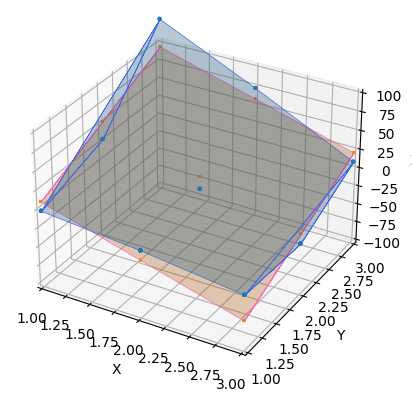

In [190]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
Xg, Yg, Zg = x1v, x2v, yv
Xg, Yg, Zg_pred = x1v, x2v, yv_pred

# Plot the 3D surface
ax.plot_surface(Xg, Yg, Zg, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

ax.scatter3D(Xg, Yg, Zg, s=4)

ax.plot_surface(Xg, Yg, Zg_pred, edgecolor='hotpink', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

ax.scatter3D(Xg, Yg, Zg_pred, s=1)

ax.set(xlim=(1, 3), ylim=(1, 3), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

### Regresión Robusta-$l_1$ (Lasso)

$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

### Regresión Robusta-$l_1 \cdot l_2$ (`ElasticNet`)

$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$

![ElasticNet](https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_coordinate_descent_path_001.png)

## Regresión logística

In [8]:
X = np.array([
    [1, 1],
    [1, 2],
    [1, 3],
    [2, 1],
    [2, 2],
    [2, 3],
    [3, 1],
    [3, 2],
    [3, 3],
])

y = np.array([1, 1, 0, 1, 0, 0, 0, 1, 1])

print(f"X = {X[:5]}")
print("-" * 70)
print(f"y = {y[:5]}")

X = [[1 1]
 [1 2]
 [1 3]
 [2 1]
 [2 2]]
----------------------------------------------------------------------
y = [1 1 0 1 0]


In [9]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

reg.fit(X, y)

reg.coef_, reg.intercept_

(array([[-2.60995134e-06, -4.06307773e-01]]), array([1.04187681]))

In [10]:
reg.score(X, y)

0.6666666666666666

In [11]:
x1 = X[:,0]
x2 = X[:,1]

x1v, x2v = np.meshgrid(x1, x2)

yv = np.zeros(x1v.shape)

n, m = x1v.shape

for i in range(n):
  for j in range(m):
    x1 = x1v[i][j]
    x2 = x2v[i][j]
    # print(x1, x2)
    yi = 0
    for index in range(len(X)):
      if tuple(X[index]) == (x1, x2):
        yi = y[index]
    # print(y)
    yv[i][j] = yi

print(f"x1 = {x1}")
print("-" * 70)
print(f"x2 = {x2}")
print("-" * 70)
print(f"x1v = {x1v}")
print("-" * 70)
print(f"x2v = {x2v}")
print("-" * 70)
print(f"yv = {yv}")

x1 = 3
----------------------------------------------------------------------
x2 = 3
----------------------------------------------------------------------
x1v = [[1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]]
----------------------------------------------------------------------
x2v = [[1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]]
----------------------------------------------------------------------
yv = [[1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [12]:
yv_pred = np.zeros(x1v.shape)

n, m = x1v.shape

for i in range(n):
  for j in range(m):
    x1 = x1v[i][j]
    x2 = x2v[i][j]
    # print(x1, x2)
    y_pred = reg.predict([[x1, x2]])[0]
    # print(y_pred)
    yv_pred[i][j] = y_pred

print(f"yv_pred = {yv_pred}")

yv_pred = [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


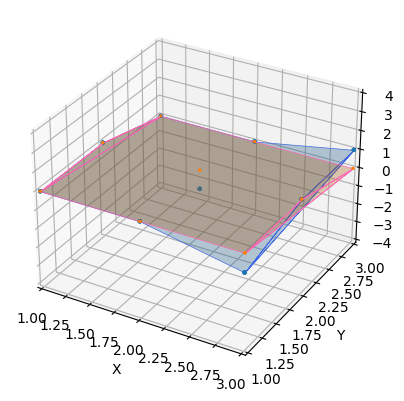

In [13]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
Xg, Yg, Zg = x1v, x2v, yv
Xg, Yg, Zg_pred = x1v, x2v, yv_pred

# Plot the 3D surface
ax.plot_surface(Xg, Yg, Zg, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

ax.scatter3D(Xg, Yg, Zg, s=4)

ax.plot_surface(Xg, Yg, Zg_pred, edgecolor='hotpink', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

ax.scatter3D(Xg, Yg, Zg_pred, s=1)

ax.set(xlim=(1, 3), ylim=(1, 3), zlim=(-4, 4),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

## Regresión bayesiana

In [18]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()

reg.fit(X, y)

reg.score(X, y)

0.8534230739751283

## Curva de aprendizaje

[https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

![Curvas de Aprendizaje](https://scikit-learn.org/stable/_images/sphx_glr_plot_learning_curve_001.png)

In [19]:
X = np.random.uniform(-10, 10, (101, 2))

# y = -2 * x1 + 7 * x2 - 6
y = np.array([-2 * x1 + 7 * x2 - 6 for x1, x2 in X]) + \
  np.random.uniform(-1, 1, len(X))

print(f"X = {X[:5]}")
print("-" * 70)
print(f"y = {y[:5]}")

X = [[-9.18490055 -0.12863498]
 [ 6.26956093 -3.94504679]
 [ 7.41773518  1.03448762]
 [-1.37015911 -1.50733706]
 [-5.87504737 -5.00044669]]
----------------------------------------------------------------------
y = [ 10.79563134 -45.65771172 -13.19069066 -14.08941406 -30.21776581]


In [20]:
from sklearn.linear_model import Ridge

reg1 = Ridge(alpha=1000)

reg1.fit(X, y)

reg1.score(X, y)

0.9414730490964869

In [21]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()

reg2.fit(X, y)

reg2.score(X, y)

0.9997993607292063

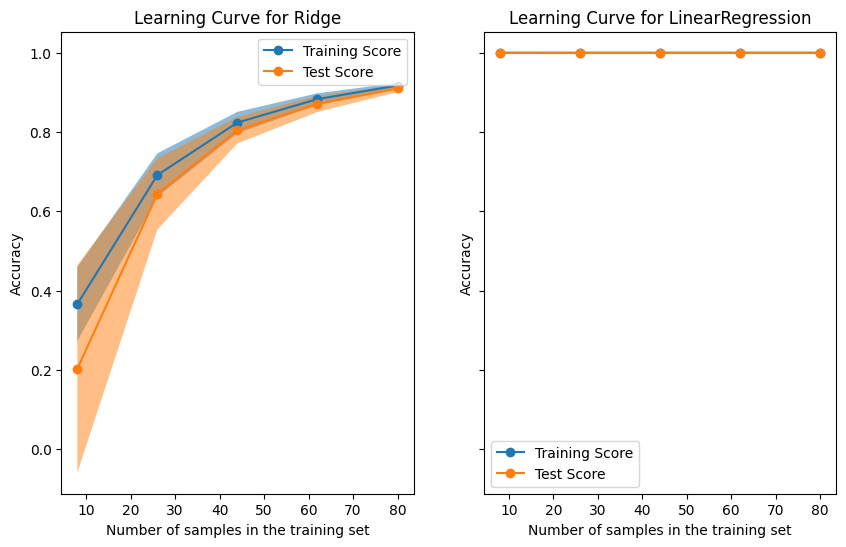

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([reg1, reg2]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")